# Laboratorio 1.
El objetivo de este laboratorio es reproducir las gráficas de las funciones de masa de probabilidad y de distribución de las variables aleatorias mostradas en el material instruccional, usando Python. Calcular la media y la varianza en todas ellas. Calcular, en los casos que en que se hizo, las probabilidades ejemplificadas.

# Actividad 1:
## Gráfica de barras de una distribución de probabilidades discreta cualquiera
Se requiere de la librería **pandas** para manejar el *data frame* y **matplotlib.pyplot** para producir la figura.
1. Se crea el *data frame* con los valores de la VA del ejemplo y sus probabilidades asociadas. 
2. Se configura el gráfico con opciones básicas y se despliega.

   x       p
0 -3  0.0625
1 -2  0.1250
2 -1  0.1875
3  0  0.2500
4  1  0.1875
5  2  0.1250
6  3  0.0625


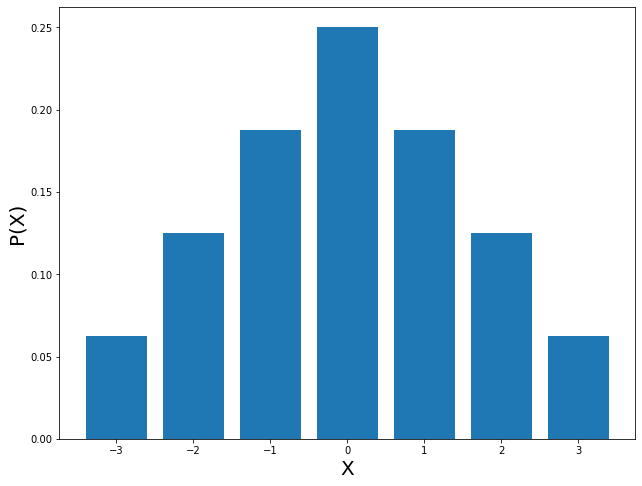

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.DataFrame({'x':[-3, -2, -1, 0, 1, 2, 3],
                   'p': [1/16, 2/16, 3/16, 4/16, 3/16, 2/16, 1/16]})
print(df)
fig = plt.figure(figsize=[8,6]) # Crear la figura con las dimensiones deseadas
ax = fig.add_axes([0,0,1,1]) # Adicionar los ejes [left, bottom, width, height] 
ax.bar(df.x, df.p) # Construir barras con x, p(x)
# Etiquetas:
ax.set_ylabel('P(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.show() # Mostrar la figura

# Actividad 2:
## Ilustrar una integral definida
Se requiere también la librería **numpy** para los cálculos numéricos y manejo de arreglos (las anteriores ya fueron cargadas en memoria).
1. Se crea el *data frame* como una exponencial negativa.
2. Se construye y despliega la figura.

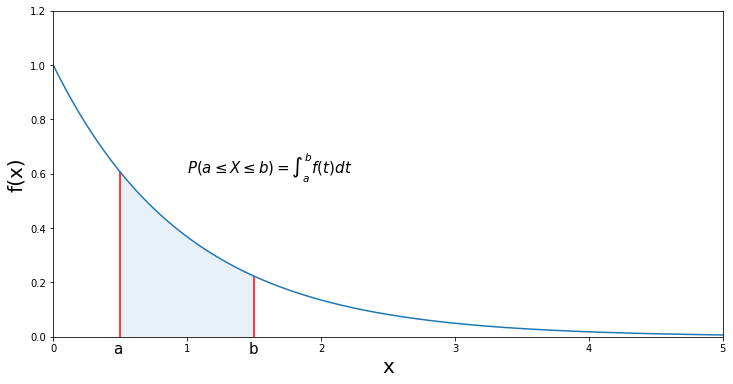

In [ ]:
import numpy as np
 
# 500 Puntos equiespaciados entre 0 y 5
df = pd.DataFrame({'x': np.linspace(0, 5, 500)}) 
# Evaluación de la exponencial negativa en cada punto
df['y'] = np.exp(-df.x)
 
plt.figure(figsize=(12,6)) # Crear la figura con las dimensiones deseadas
plt.plot(df.x, df.y) # Desplegar la función
plt.xlim([0, 5]) # Límites a mostrar en X
plt.ylim([0, 1.2]) # Límites a mostrar en Y
# Dibujar las lineas verticales en color rojo
plt.vlines(0.5, 0, np.exp(-0.5), colors='red', label='a')
plt.vlines(1.5, 0, np.exp(-1.5), colors='red', label='b')
# Mostrar los nombres de los puntos que representan las líneas
plt.text(0.45, -0.06, "a", size=15)
plt.text(1.46, -0.06, "b", size=15)
# Escribir (usando LaTeX) la ecuación ilustrativa
plt.text(1, 0.6, r'$P(a\leq X\leq b)=\int_a^b f(t)dt$', size=15)
# Rellenar con azul claro el área bajo la curva señalada
plt.fill_between(df.x, 0, df.y, where=(df.x>0.5) & (df.x<=1.5), alpha=0.1)
# Etiquetas de los ejes
plt.ylabel('f(x)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.show() # Despliegue de la figura

# Actividad 3:
## Distribución uniforme discreta
No se requieren librerías adicionales a las ya cargadas. Las funciones de masa de probabilidad y de distribución se pueden construir manualmente, como en la actividad 1.

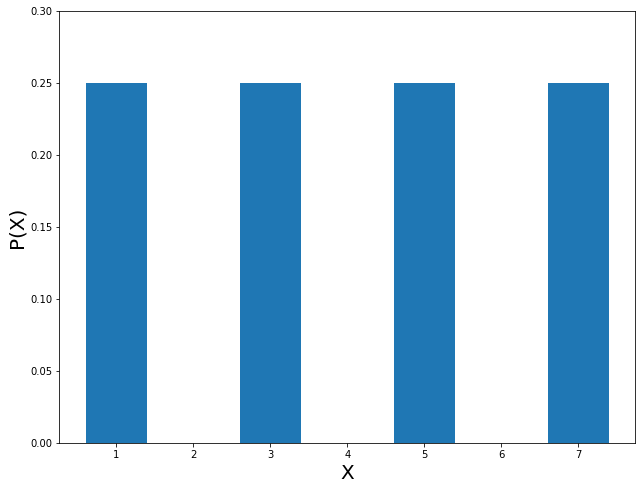

La media es:  4.0 . La varianza es:  5.0 



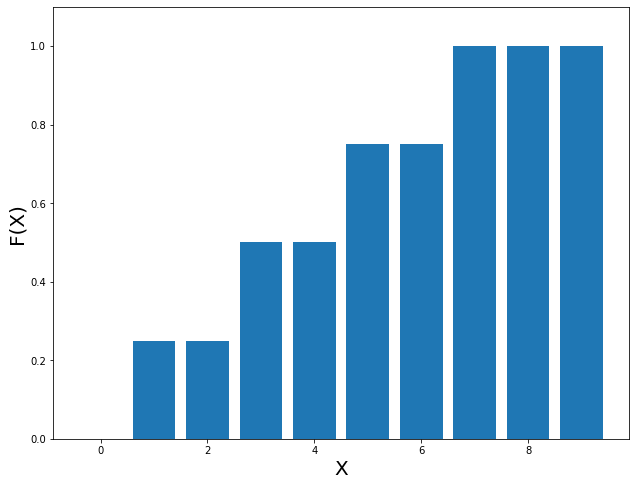

In [ ]:
# Función de masa de probabilidad (fmp)
df = pd.DataFrame({'x':[1, 3, 5, 7],
                   'p': [1/4, 1/4, 1/4, 1/4]})
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.p)
ax.set_ylabel('P(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 0.3]) # Sólo se necesita ajustar los límites para Y
plt.show()

# Media y varianza
med = df['x'].mean()
# Varianza poblacional. Por defecto ddof=1 para la muestral. 
var = df['x'].var(ddof=0)
# Mostrar el resultado
print("La media es: ", med, ". La varianza es: ", var, "\n")

# Función de distribución
df = pd.DataFrame({'x':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'p': [0, 1/4, 1/4, 2/4, 2/4, 3/4, 3/4, 1, 1, 1]})
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.p)
ax.set_ylabel('F(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 1.1])
plt.show()

# Actividad 4:
## Distribución de Bernoulli
Construída manualmente a partir del valor de la probabilidad de éxito $p$.

La media es:  0.037 . La varianza es:  0.036 



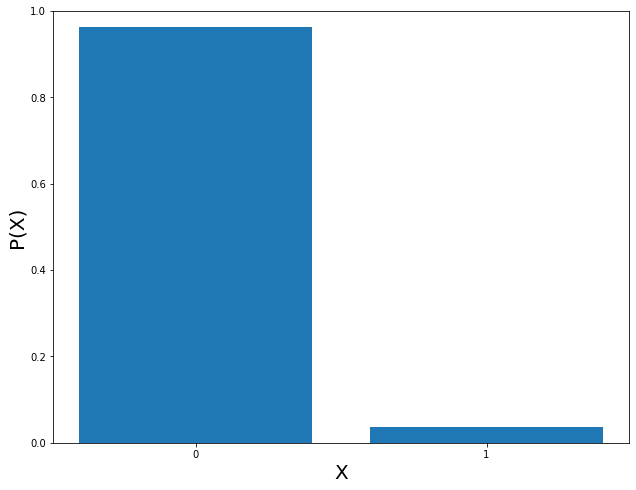

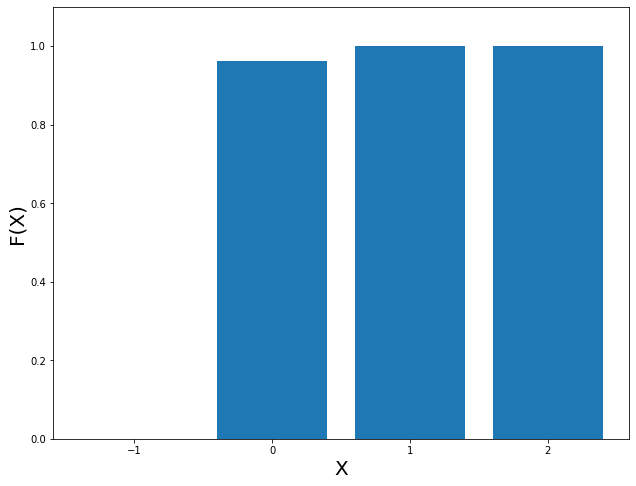

In [ ]:
# Definición de los parámetros, cálculo de la media y varianza
p = round(38280/1040000, 3) # La probabilidad de éxito del ejemplo
q = round(1-p, 3) # La probabilidad de fracaso (complemento)
med = p
var = round(p*q,3)
print("La media es: ", med, ". La varianza es: ", var, "\n")

# fmp
df = pd.DataFrame({'x':[0, 1],
                   'p': [1-p, p]})
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.p)
ax.set_ylabel('P(X)', fontsize=20)
plt.xticks(df.x) # Establecer que las marcas en X sean sólo las requeridas
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 1])
plt.show()

# Función de distribución
df = pd.DataFrame({'x':[-1, 0, 1, 2],
                   'p': [0, 1-p, 1, 1]})
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.p)
ax.set_ylabel('F(X)', fontsize=20)
plt.xticks(df.x)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 1.1])
plt.show()

# Actividad 5:
## Distribución binomial
Ahora se construye automáticamente usando de la librería **scipy.stats**, la función **binom**.
1. Se establece el valor $n$ del número de ensayos.
2. El valor de $p$ es el mismo de antes.
3. Se producen los valores de la media y varianza.
4. Se construye un *data frame* con los valores de la VA y sus probabilidades binomiales.

La media es:  1.48 .
La varianza es:  1.425 



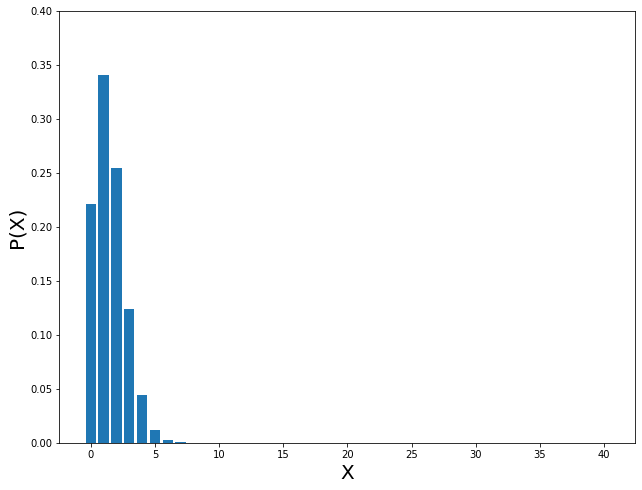

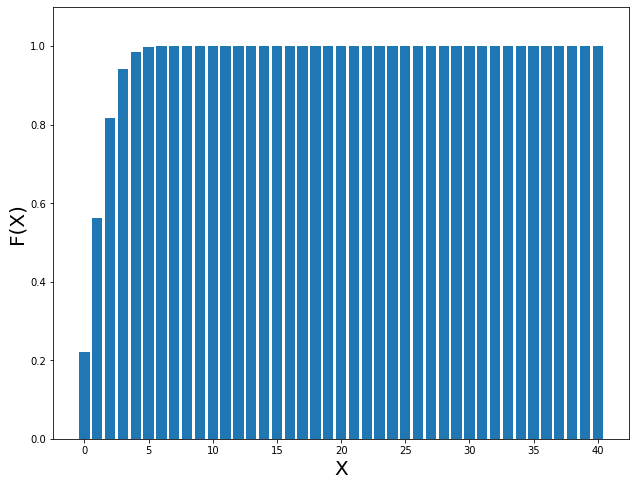

   x         p         F
0  0  0.221336  0.221336
1  1  0.340163  0.561499
2  2  0.254857  0.816356
3  3  0.124032  0.940388
4  4  0.044081  0.984469
5  5  0.012194  0.996664
6  6  0.002733  0.999397
7  7  0.000510  0.999907
P(X=5) =  0.01219
P(X <= 6) =  0.9994
P(X < 3) =  0.81636
P(3<= X <= 6) =  0.18304


In [ ]:
from scipy.stats import binom 

n = 40 # N° de ensayos independientes de Bernoulli con probabilidad p
# Cálculo de la media y varianza con binom.
med, var = binom.stats(n, p) 
print("La media es: ", round(float(med),3), ".")
print("La varianza es: ", round(float(var),3), "\n")

# Construcción del df para graficar
df = pd.DataFrame({'x': range(n + 1)}) # de 0 a n (incluyéndola)
df['p'] = binom.pmf(df.x, n, p) # Función de masa de probabilidades
df['F'] = binom.cdf(df.x, n, p) # Función de distribución

# fmp
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.p)
ax.set_ylabel('P(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 0.4])
plt.show()

# Función de distribución
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.F)
ax.set_ylabel('F(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 1.1])
plt.show()

# Cálculo de probabilidades binomiales
print(df[:8]) # Mostrando las primeras 8
print("P(X=5) = ", round(df['p'][5], 5))
print("P(X <= 6) = ", round(df['F'][6], 5))
print("P(X < 3) = ", round(df['F'][2], 5))
print("P(3<= X <= 6) = ", round(df['F'][6]-df['F'][2], 5))



# Actividad 6:
## Distribución de Poisson
De forma automática con la librería **scipy.stats**, ahora importando la función **poisson**.
1. Aunque la Poisson no tiene límite, lo establecemos en un $n$ razonable para poder graficar.
2. El parámetro requerido es $\lambda$ (l).

La media es:  12.0 .
La varianza es:  12.0 



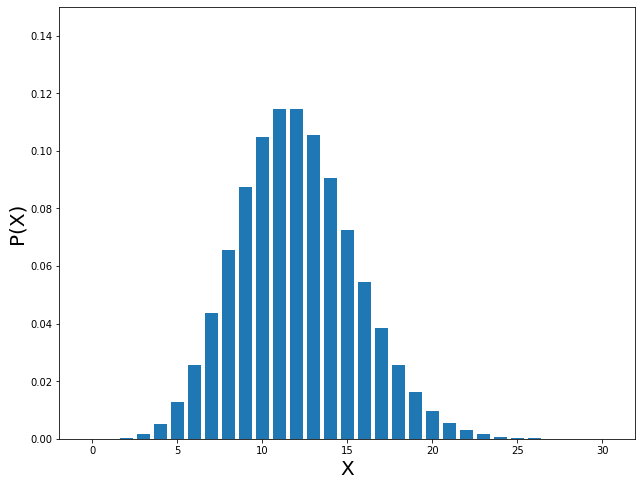

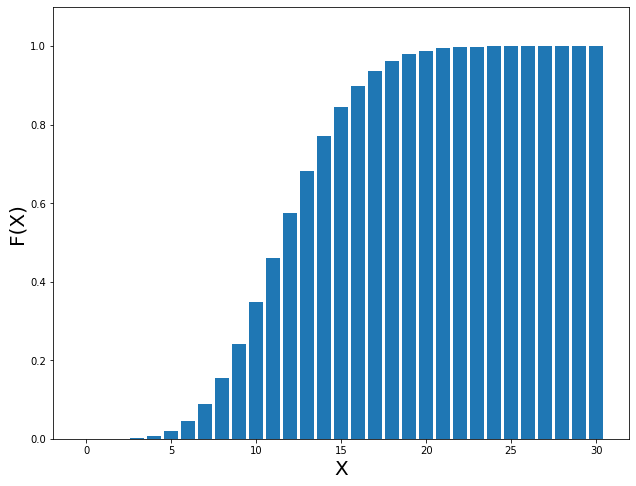

     x         p         F
0    0  0.000006  0.000006
1    1  0.000074  0.000080
2    2  0.000442  0.000522
3    3  0.001770  0.002292
4    4  0.005309  0.007600
5    5  0.012741  0.020341
6    6  0.025481  0.045822
7    7  0.043682  0.089504
8    8  0.065523  0.155028
9    9  0.087364  0.242392
10  10  0.104837  0.347229
11  11  0.114368  0.461597
12  12  0.114368  0.575965
13  13  0.105570  0.681536
14  14  0.090489  0.772025
15  15  0.072391  0.844416
16  16  0.054293  0.898709
17  17  0.038325  0.937034
18  18  0.025550  0.962584
19  19  0.016137  0.978720
20  20  0.009682  0.988402
21  21  0.005533  0.993935
22  22  0.003018  0.996953
23  23  0.001574  0.998527
24  24  0.000787  0.999314
25  25  0.000378  0.999692
26  26  0.000174  0.999867
27  27  0.000078  0.999944
28  28  0.000033  0.999977
29  29  0.000014  0.999991
30  30  0.000005  0.999997
P(X < 6) =  0.02034
P(X <= 10) =  0.34723
P(5 < X <= 10) =  0.32689


In [ ]:
from scipy.stats import poisson 

n = 30 # Valor razonable para poder graficar
l = 12 # Tasa de ocurrencias por unidad de tiempo. En el ejemplo, días
df = pd.DataFrame({'x': range(n + 1)})
df['p'] = poisson.pmf(df.x, l) # fmp
df['F'] = poisson.cdf(df.x, l) # Función de distribución
med, var = poisson.stats(l) 
print("La media es: ", round(float(med),3), ".")
print("La varianza es: ", round(float(var),3), "\n")

# Fmp
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.p)
ax.set_ylabel('P(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 0.15])
plt.show()

# Función de distribución
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.F)
ax.set_ylabel('F(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 1.1])
plt.show()

# Las probabilidades
print(df)
print("P(X < 6) = ", round(df['F'][5], 5))
print("P(X <= 10) = ", round(df['F'][10], 5))
print("P(5 < X <= 10) = ", round(df['F'][10]-df['F'][5], 5))

# Tarea 1:
Investigar de qué se trata la variable aleatoria geométrica. Construir y desplegar las gráficas de las fmp y función de distribución para dicha VA usando la librería **scipy.stats**. Calcular 4 probabilidades interesantes.

## Dist. Geométrica

Expresa la probabilidad de tener que esperar exactamente r pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es p. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

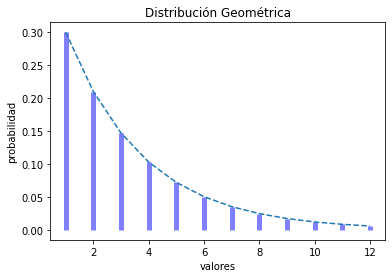

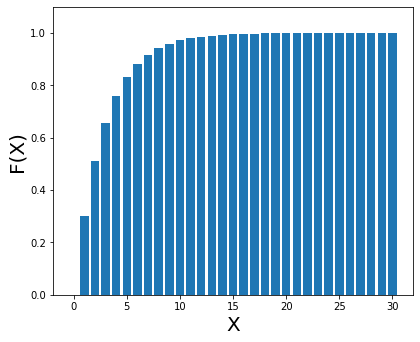

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Distribución
p =  0.3 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))

#fmp
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# Función de distribución
df = pd.DataFrame({'x': range(n + 1)})
df['F'] = stats.geom.cdf(df.x, p)
fig = plt.figure(figsize=[5,4])
ax = fig.add_axes([0,0,1,1])
ax.bar(df.x, df.F)
ax.set_ylabel('F(X)', fontsize=20)
ax.set_xlabel('X', fontsize=20)
plt.ylim([0, 1.1])
plt.show()